In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.python.keras.callbacks import TensorBoard
import time
import pickle

In [18]:
x = pickle.load(open("x_t.pickle","rb"))
y = pickle.load(open("y_t.pickle","rb"))

In [12]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [19]:
import matplotlib.pyplot as plt
import numpy as np
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

for i in range(len(x)):
    x[i] = rgb2gray(x[i])
    y[i] = np.int8(y[i])
x = np.array(x)
y = np.array(y)


(28, 28)
()
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


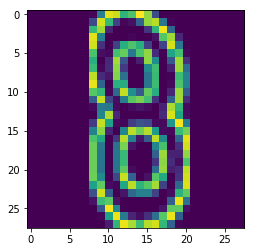

In [20]:
plt.imshow(x[3])
print(x[0].shape)
print(y[0].shape)
print(type(y))
print(type(x))

In [16]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[tf.keras.callbacks.TensorBoard('logs')])
model.evaluate(x, y)


Epoch 1/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2184 - acc: 0.9358
Epoch 2/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0972 - acc: 0.9701
Epoch 3/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.0684 - acc: 0.9787
Epoch 4/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.0542 - acc: 0.9826
Epoch 5/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0440 - acc: 0.9859
Epoch 6/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0362 - acc: 0.9887
Epoch 7/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0313 - acc: 0.9898
Epoch 8/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0280 - acc: 0.9899
Epoch 9/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0239 - acc: 0.9922
Epoch 10/10
280/280 [==============================] - 0s 228us/sample - loss: 2.9

[2.9142303807394847, 0.1]

In [23]:
# Load TENSORBOARD
%load_ext tensorboard.notebook
# Start TENSORBOARD
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 14528), started 2 days, 2:00:00 ago. (Use '!kill 14528' to kill it.)

5


array([5, 6, 6, 6, 9, 8, 6, 2, 7, 5, 6, 6, 3, 6, 5, 6, 2, 3, 6, 5, 8, 3,
       5, 3, 8, 3, 3, 3, 5, 3, 3, 8, 2, 5, 8, 6, 6, 8, 7, 5, 7, 3, 6, 2,
       2, 3, 6, 7, 2, 6, 6, 3, 3, 6, 5, 5, 7, 2, 6, 2, 6, 2, 9, 6, 6, 6,
       5, 2, 6, 3, 7, 5, 6, 5, 3, 6, 2, 3, 6, 7, 5, 6, 9, 6, 5, 2, 5, 5,
       9, 3, 6, 5, 6, 3, 6, 6, 6, 5, 3, 5, 6, 6, 5, 7, 3, 8, 3, 3, 6, 6,
       2, 7, 6, 2, 3, 3, 6, 6, 5, 6, 3, 7, 3, 2, 7, 5, 5, 5, 6, 6, 6, 6,
       6, 7, 6, 3, 3, 5, 7, 8, 3, 3, 8, 3, 7, 3, 3, 3, 2, 6, 3, 6, 8, 3,
       6, 3, 6, 8, 6, 8, 6, 6, 6, 3, 3, 7, 6, 7, 6, 3, 3, 2, 3, 3, 6, 8,
       2, 2, 6, 7, 6, 6, 2, 7, 3, 3, 6, 8, 3, 3, 7, 6, 7, 3, 6, 6, 2, 8,
       8, 8, 3, 6, 2, 6, 8, 9, 6, 6, 8, 3, 6, 3, 6, 3, 6, 6, 6, 8, 8, 6,
       6, 8, 6, 3, 3, 8, 7, 6, 6, 8, 8, 5, 6, 2, 6, 6, 8, 5, 2, 5, 5, 6,
       3, 7, 6, 2, 6, 3, 7, 6, 6, 6, 9, 3, 3, 3, 2, 5, 2, 7, 8, 6, 6, 6,
       9, 6, 5, 6, 3, 6, 5, 7, 3, 6, 9, 6, 7, 6, 3, 8], dtype=int64)

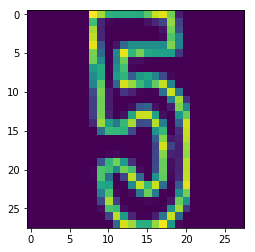

In [21]:
plt.imshow(x[14])
print(y[14])
model.predict_classes(x)

In [22]:
model.evaluate(x, y)

280/280 [==============================] - 0s 53us/sample - loss: 10.2466 - acc: 0.3607


[10.246554020472935, 0.3607143]